# Fake News Detection

**Author**: Marcelo Scatena
***
March 2022

## Neural Networks

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [13]:
from nltk.corpus import stopwords
import re
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [343]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import numpy as np

## Neural Networks <a class="anchor" id="Classification"></a>

In [62]:
%store -r df_train_clean
%store -r df_val_clean
%store -r df_test_clean

In [67]:
X_train_clean = df_train_clean['statement']
y_train_clean = df_train_clean['label']
X_val_clean = df_val_clean['statement']
y_val_clean = df_val_clean['label']
X_test_clean = df_test_clean['statement']
y_test_clean = df_test_clean['label']

In [68]:
X_train_clean = np.asarray(X_train_clean)
X_val_clean = np.asarray(X_val_clean)
X_test_clean = np.asarray(X_test_clean)

In [71]:
from tensorflow.keras import layers, losses, regularizers

In [72]:
from collections import Counter

In [73]:
from sklearn.preprocessing import LabelEncoder

In [86]:
import pydot

In [75]:
import tensorflow as tf

In [82]:
import tensorflow_hub as hub

In [77]:
le = LabelEncoder()

In [78]:
train_labels = le.fit_transform(y_train_clean)

In [79]:
train_labels = np.asarray(tf.keras.utils.to_categorical(train_labels))

In [83]:
val_labels = le.transform(y_val_clean)
test_labels = le.transform(y_test_clean)

val_labels = np.asarray(tf.keras.utils.to_categorical(val_labels))
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))

In [84]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_clean, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((X_val_clean, val_labels))
test_ds = tf.data.Dataset.from_tensor_slices((X_test_clean, test_labels))

In [87]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"

In [89]:
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [93]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 124,644,000
Trainable params: 124,644,000
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['CategoricalAccuracy'])

In [103]:
tf.keras.utils.plot_model(model, 'simpleNN_model.png', show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [109]:
epochs = 15

history = model.fit(train_ds.shuffle(2000).batch(128),
                    epochs=epochs,
                    validation_data=val_ds.batch(128),
                    verbose=1)

Epoch 1/15
80/80 [==============================] - 63s 782ms/step - loss: 0.0038 - categorical_accuracy: 0.9983 - val_loss: 3.5935 - val_categorical_accuracy: 0.5958
Epoch 2/15
80/80 [==============================] - 62s 778ms/step - loss: 0.0042 - categorical_accuracy: 0.9983 - val_loss: 3.6257 - val_categorical_accuracy: 0.5942
Epoch 3/15
80/80 [==============================] - 63s 782ms/step - loss: 0.0035 - categorical_accuracy: 0.9983 - val_loss: 3.6735 - val_categorical_accuracy: 0.5950
Epoch 4/15
80/80 [==============================] - 65s 817ms/step - loss: 0.0041 - categorical_accuracy: 0.9982 - val_loss: 3.7041 - val_categorical_accuracy: 0.6005
Epoch 5/15
80/80 [==============================] - 67s 842ms/step - loss: 0.0040 - categorical_accuracy: 0.9982 - val_loss: 3.7387 - val_categorical_accuracy: 0.5974
Epoch 6/15
80/80 [==============================] - 67s 840ms/step - loss: 0.0035 - categorical_accuracy: 0.9983 - val_loss: 3.7722 - val_categorical_accuracy: 0.597

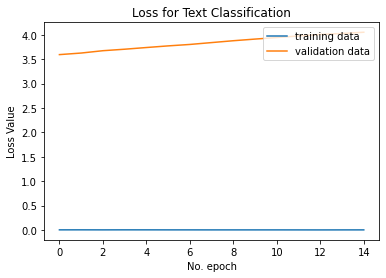

In [111]:
plt.plot(history.history['loss'], label='training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss Value')
plt.xlabel('No. epoch')
plt.legend(loc='upper right')
plt.show()

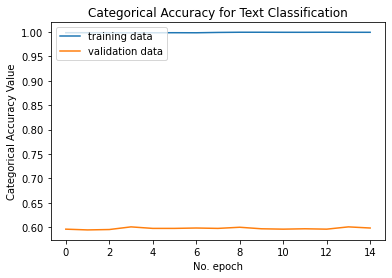

In [115]:
plt.plot(history.history['categorical_accuracy'], label='training data')
plt.plot(history.history['val_categorical_accuracy'], label='validation data')
plt.title('Categorical Accuracy for Text Classification')
plt.ylabel('Categorical Accuracy Value')
plt.xlabel('No. epoch')
plt.legend(loc='upper left')
plt.show()

In [117]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_regularizer=regularizers.l2(0.05)))

In [118]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               124642688 
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 124,644,000
Trainable params: 124,644,000
Non-trainable params: 0
_________________________________________________________________


In [119]:
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['CategoricalAccuracy'])

In [120]:
epochs = 15

history1 = model1.fit(train_ds.shuffle(1000).batch(128),
                    epochs=epochs,
                    validation_data=val_ds.batch(128),
                    verbose=1)

Epoch 1/15
80/80 [==============================] - 64s 783ms/step - loss: 1.3386 - categorical_accuracy: 0.6059 - val_loss: 1.0298 - val_categorical_accuracy: 0.6729
Epoch 2/15
80/80 [==============================] - 63s 785ms/step - loss: 0.8538 - categorical_accuracy: 0.6912 - val_loss: 0.8059 - val_categorical_accuracy: 0.6698
Epoch 3/15
80/80 [==============================] - 61s 760ms/step - loss: 0.6859 - categorical_accuracy: 0.7437 - val_loss: 0.7447 - val_categorical_accuracy: 0.6581
Epoch 4/15
80/80 [==============================] - 60s 748ms/step - loss: 0.6267 - categorical_accuracy: 0.7654 - val_loss: 0.7304 - val_categorical_accuracy: 0.6604
Epoch 5/15
80/80 [==============================] - 64s 800ms/step - loss: 0.5979 - categorical_accuracy: 0.7909 - val_loss: 0.7322 - val_categorical_accuracy: 0.6542
Epoch 6/15
80/80 [==============================] - 63s 786ms/step - loss: 0.5830 - categorical_accuracy: 0.8021 - val_loss: 0.7335 - val_categorical_accuracy: 0.660

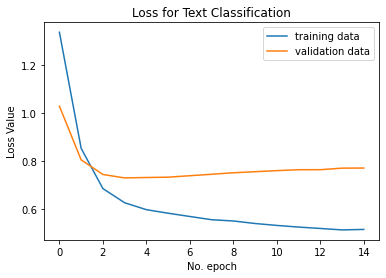

In [122]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss Value')
plt.xlabel('No. epoch')
plt.legend(loc='upper right')
plt.show()

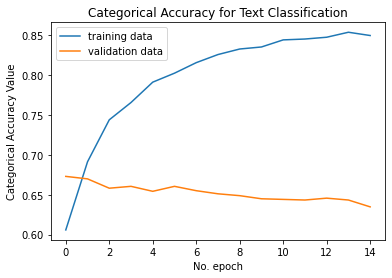

In [123]:
plt.plot(history1.history['categorical_accuracy'], label='training data')
plt.plot(history1.history['val_categorical_accuracy'], label='validation data')
plt.title('Categorical Accuracy for Text Classification')
plt.ylabel('Categorical Accuracy Value')
plt.xlabel('No. epoch')
plt.legend(loc='upper left')
plt.show()

In [129]:
from sklearn.metrics import accuracy_score

In [127]:
pred_val_y = model1.predict(X_val_clean)

In [136]:
pre_y_continuous = []
for combination in pred_val_y:
    if combination[0] > 0.5:
        pre_y_continuous.append(0)
    else:
        pre_y_continuous.append(1)

In [139]:
accuracy_score(y_val_clean, pre_y_continuous)

0.6339563862928349

In [169]:
df_train_clean_copy = df_train_clean.copy()

In [179]:
vectorizer = TfidfVectorizer()

In [181]:
tfidf = vectorizer.fit_transform(df_train_clean_copy['statement'])

In [212]:
tfidf

<10240x10608 sparse matrix of type '<class 'numpy.float64'>'
	with 109086 stored elements in Compressed Sparse Row format>

In [229]:
tfidf.shape

(10240, 10608)

In [211]:
tf.convert_to_tensor(tfidf.shape)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10240, 10608])>

In [206]:
df_train_clean_copy

,statement,label
0.0,say annies list political group support third ...,1
1.0,decline coal start started natural gas took st...,1
2.0,hillary clinton agrees john mccain voting give...,0
3.0,health care reform legislation likely mandate ...,1
4.0,economic turnaround started end term,1
...,...,...
10264.0,larger number shark attack florida case voter ...,0
10265.0,democrat become party atlanta metro area black,0
10266.0,say alternative social security operates galve...,1
10267.0,lifting u cuban embargo allowing travel cuba,1


In [142]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

# tfds.disable_progress_bar()

In [143]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [144]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Scatena\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete2M8XCT\imdb_reviews-tra…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Scatena\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete2M8XCT\imdb_reviews-tes…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Scatena\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incomplete2M8XCT\imdb_reviews-uns…

Dataset imdb_reviews downloaded and prepared to C:\Users\Scatena\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [147]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [145]:
for example, label in train_dataset.take(1):
    print('text: ', example.numpy())
    print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [148]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [149]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [150]:
for example, label in train_dataset.take(1):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])

texts:  [b"Australia's first mainstream slasher film hits the screen with a bang. And a stab. And a slice. And a scream or two. And plenty of blood, frights, red herrings and lots of laughs.<br /><br />In fact, there's lots of first surrounding Cut - it's the first script of Dave Warner's to be produced, although he has several others either optioned or in negotiation; it's the first major film from director and former Hoodoo Guru Kimble Rendall; and it's also the first film for producer Martin Fabinyi. And for a bunch of guys dipping their toes into this genre for the first time, they sure know their stuff.<br /><br />Cut tells the story of a bunch of Australian film students who hear about a slasher film, Hot Blooded, that was never finished because its director, Hilary (Kylie Minogue), was killed by the actor playing the psycho killer in the film.<br /><br />Despite their lecturer (who was assistant director on the night Hilary died) warning them that whenever someone tries to start

In [151]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [152]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [153]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1,  86,   1, ...,   0,   0,   0],
       [  9,  14,   1, ...,   0,   0,   0],
       [  2,  18, 500, ...,   0,   0,   0]], dtype=int64)

In [154]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b"Australia's first mainstream slasher film hits the screen with a bang. And a stab. And a slice. And a scream or two. And plenty of blood, frights, red herrings and lots of laughs.<br /><br />In fact, there's lots of first surrounding Cut - it's the first script of Dave Warner's to be produced, although he has several others either optioned or in negotiation; it's the first major film from director and former Hoodoo Guru Kimble Rendall; and it's also the first film for producer Martin Fabinyi. And for a bunch of guys dipping their toes into this genre for the first time, they sure know their stuff.<br /><br />Cut tells the story of a bunch of Australian film students who hear about a slasher film, Hot Blooded, that was never finished because its director, Hilary (Kylie Minogue), was killed by the actor playing the psycho killer in the film.<br /><br />Despite their lecturer (who was assistant director on the night Hilary died) warning them that whenever someone tries to sta

In [155]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [156]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [157]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.00294946]


In [158]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[0.00294946]


In [159]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [161]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [ ]:
# Create a function to show most similar words, or are closest to the given word
def show_most_similar(word, length=10):
    return wv.most_similar(word, topn=length)

#### Examinig Vectors

In [ ]:
show_most_similar('trump')

In [ ]:
show_most_similar('war')

In [ ]:
show_most_similar('election')

In [ ]:
show_most_similar('president')

In [ ]:
from nltk.collocations import *
# from nltk import TweetTokenizer

# tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True)

# X_train_twt = tweet_tokenizer.tokenize(' '.join(X_train_w2v.apply(lambda x: ' '.join(x))))

In [ ]:
# Use BigramAssocMeasures from nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(X_train_w2v)
bigrams = finder.score_ngrams(bigram_measures.raw_freq)

In [ ]:
# Display the top 50 bigrams
bigrams[:50]